In [1]:
import pandas as pd
import string

In [2]:
df = pd.read_csv('./csv/total_data.csv',index_col=0)
df['name'] = df['name'].str.translate({key:32 for key in str.maketrans('','',string.punctuation)})
df.head()

,name,price,type,material,madefrom,color
0,리틀퍼피클럽 핫팩 파우치 세트 라이언 어피치,"29,000원",touched,NaN,중국,NaN
1,리틀퍼피클럽 양털부츠 라이언 어피치,"25,000원",touched,폴리에스터 100%,중국,NaN
2,꿀잠친구 고슴도치 리틀라이언,"42,000원",touched,"[표면] 폴리에스터 96%, 폴리우레탄 4% [충전재] 폴리에스터 100%",중국,혼합
3,고흥 유자를 선물합니다 자임 꿀유자차 580g x 2병,"13,900원",touched,NaN,NaN,NaN
4,오설록 오 땡큐 티박스 6종 선물세트 총30입,"22,000원",touched,해당사항없음,NaN,NaN


In [46]:
df['name'].head()

0            리틀퍼피클럽 핫팩 파우치 세트 라이언 어피치
1                 리틀퍼피클럽 양털부츠 라이언 어피치
2                     꿀잠친구 고슴도치 리틀라이언
3     고흥 유자를 선물합니다  자임 꿀유자차 580g x 2병
4          오설록 오 땡큐 티박스 6종 선물세트 총30입 
Name: name, dtype: object

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
count_vector = CountVectorizer(ngram_range=(1,3))

In [52]:
c_vector_name = count_vector.fit_transform(df['name'])

In [53]:
c_vector_name.shape

(850, 10478)

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
genre_c_sim = cosine_similarity(c_vector_name, c_vector_name).argsort()[:,::-1]


In [62]:
norm_sim = 1-(genre_c_sim/np.amax(genre_c_sim))
norm_sim

array([[1.        , 0.99882214, 0.12838634, ..., 0.36513545, 0.36631331,
        0.50058893],
       [0.99882214, 0.12838634, 1.        , ..., 0.34628975, 0.34746761,
        0.50058893],
       [0.99764429, 0.        , 0.67255595, ..., 0.33922261, 0.34040047,
        1.        ],
       ...,
       [0.00235571, 0.23557126, 0.12249706, ..., 0.3828033 , 0.38398115,
        0.        ],
       [0.00117786, 0.12014134, 0.05182568, ..., 0.34275618, 0.34393404,
        1.        ],
       [0.        , 0.35453475, 0.02120141, ..., 0.41224971, 0.41460542,
        1.        ]])

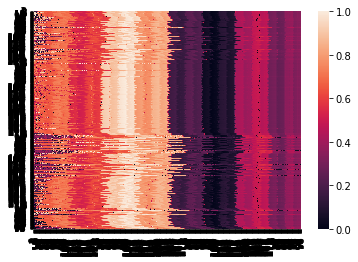

In [63]:
ax = sns.heatmap(norm_sim,
                 xticklabels= df.index, 
                 yticklabels= df.index)



In [12]:
genre_c_sim.shape

(850, 850)

In [18]:
def get_recommend_name_list(df, name, top=30):
    target_movie_index = df[df['name'] == name].index.values
    
    sim_index = genre_c_sim[target_movie_index, :top].reshape(-1)
    
    sim_index = sim_index[sim_index!= target_movie_index]
    
    result = df.iloc[sim_index].sort_values('price',ascending = False)[:10]
    
    return result



In [19]:
get_recommend_name_list(df, '리틀퍼피클럽 핫팩 파우치 세트 라이언 어피치')

,name,price,type,material,madefrom,color
71,맥포머스 어메이징 폴리스 세트 50pcs,"88,000원",baby,"ABS, 자석, TPR, PVC",중국,파랑 외
93,스틱오by맥포머스 핑크퐁 아기상어 프렌즈 세트,"55,200원",baby,"자석,ABS,스틸",중국,빨강 외
5,리틀퍼피클럽 싱글이불담요,"49,000원",touched,폴리에스터 100%,중국,혼합
265,시원한아이스머그 라이언 어피치,46%,funny,폴리스티렌(PS) 외,중국,NaN
79,40253 크리스마스 조립 세트 레고 크리에이터,"41,400원",baby,ABS수지,NaN,컨텐츠 참조
2,세트 타요 롱 캐리어카 꼬마버스 친구들 세트 6종,"34,900원",baby,NaN,NaN,NaN
224,라이언 크리미 맥주 거품기,34%,funny,NaN,중국,NaN
210,모션감지 센서등 건전지타입 라이언 춘식이,"32,000원",funny,NaN,중국,NaN
249,춘식이 형압 패드 파우치,"32,000원",funny,"[외부] PU, EVA [내부] 폴리에스터,지퍼슬라이더 : PVC",중국,NaN
93,카카오프렌즈 라이언 춘식이 이글루 무드등 가습기 500ml,"29,900원",touched,NaN,중국,NaN


In [22]:
name = '리틀퍼피클럽 핫팩 파우치 세트 라이언 어피치'
top = 30


target_movie_index = df[df['name'] == name].index.values
    
sim_index = genre_c_sim[target_movie_index, :top].reshape(-1)

sim_index = sim_index[sim_index!= target_movie_index]

result = df.iloc[sim_index].sort_values('price',ascending = False)[:10]


In [24]:
target_movie_index

array([0])

In [23]:
sim_index

array([  1, 740,   5, 736, 755, 556, 174, 475, 732, 132, 699, 748, 731,
       724, 737, 824, 692, 846, 704, 685, 168, 615, 375, 832, 131, 665,
       738,  93, 284])

In [35]:
genre_c_sim

array([[  0,   1, 740, ..., 539, 538, 424],
       [  1, 740,   0, ..., 555, 554, 424],
       [  2, 849, 278, ..., 561, 560,   0],
       ...,
       [847, 649, 745, ..., 524, 523, 849],
       [848, 747, 805, ..., 558, 557,   0],
       [849, 548, 831, ..., 499, 497,   0]])

In [33]:
heat_df = pd.DataFrame(genre_c_sim)

In [38]:
heat_df

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,0,1,740,5,736,755,556,174,475,732,...,546,545,544,543,542,541,540,539,538,424
1,1,740,0,736,5,475,748,699,731,692,...,563,562,561,560,559,558,557,555,554,424
2,2,849,278,289,288,287,286,285,284,283,...,568,567,566,565,564,563,562,561,560,0
3,3,849,278,289,288,287,286,285,284,283,...,568,567,566,565,564,563,562,561,560,0
4,4,62,796,16,164,39,75,795,92,60,...,561,560,559,558,557,556,555,554,553,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,845,597,647,825,784,776,838,771,809,821,...,530,529,528,527,526,525,524,523,522,0
846,846,819,755,732,824,168,0,665,615,738,...,552,551,550,549,548,547,546,545,544,424
847,847,649,745,424,748,735,683,623,296,408,...,531,530,529,528,527,526,525,524,523,849
848,848,747,805,787,794,268,269,287,286,285,...,565,564,563,562,561,560,559,558,557,0


In [32]:
tㅗ

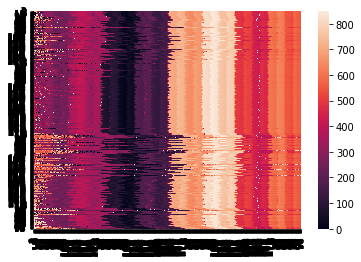

In [45]:
ax = sns.heatmap(genre_c_sim,
                 xticklabels= df.index, 
                 yticklabels= df.index)

